# ABS - Australian Bureau of Statistics
## Lending Indicators Data

## Table 1. 
Households; Housing finance; Total dwellings; By property purpose; New loan commitments; Values

### Import Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# Load CSV file
df_total_loans = pd.read_csv("../Datasets/df_total_loans.csv")
df_total_loans.head(5)

,date,segment,buyer_type,loan_count,loan_value_million
0,2002-09-01,Investor,Total,NaN,11009.5
1,2002-09-01,Owner-occupier,First Home Buyer,24529.0,4121.6
2,2002-09-01,Owner-occupier,Non-First Home Buyer,64722.0,12468.5
3,2002-09-01,Owner-occupier,Total,89705.0,16698.5
4,2002-09-01,Total,Total,NaN,27708.0


In [3]:
df_total_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                465 non-null    object 
 1   segment             465 non-null    object 
 2   buyer_type          465 non-null    object 
 3   loan_count          329 non-null    float64
 4   loan_value_million  465 non-null    float64
dtypes: float64(2), object(3)
memory usage: 18.3+ KB


In [4]:
# Value counts for segment
print("Segment value counts:")
print(df_total_loans["segment"].value_counts())

# Value counts for buyer_type
print("\nBuyer Type value counts:")
print(df_total_loans["buyer_type"].value_counts())


Segment value counts:
segment
Owner-occupier    279
Investor           93
Total              93
Name: count, dtype: int64

Buyer Type value counts:
buyer_type
Total                   279
First Home Buyer         93
Non-First Home Buyer     93
Name: count, dtype: int64


In [5]:
df_total_loans.describe()

,loan_count,loan_value_million
count,329.000000,465.000000
mean,61650.173252,28141.192043
std,31391.607683,18360.699880
min,18264.000000,3845.500000
25%,30609.000000,15066.300000
50%,60407.000000,23852.300000
75%,82555.000000,37701.600000
max,157887.000000,98005.100000


##### Convert date to datetime

In [6]:

df_total_loans["date"] = pd.to_datetime(df_total_loans["date"])

In [7]:
df_total_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                465 non-null    datetime64[ns]
 1   segment             465 non-null    object        
 2   buyer_type          465 non-null    object        
 3   loan_count          329 non-null    float64       
 4   loan_value_million  465 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 18.3+ KB


##### Handling Missing Values

In [9]:
df_total_loans.isnull().sum()

date                    0
segment                 0
buyer_type              0
loan_count            136
loan_value_million      0
dtype: int64

loan_count

Non-null: 329 (~71%)

Missing values: 136 (~29%)

Reason for missing data:

Loan counts are not reported for aggregated “Total” rows. This is a structural missingness, not a data quality issue

In [48]:
# Drop rows where both segment and buyer_type are "Total"
df_clean = df_total_loans[~((df_total_loans["segment"] == "Total") & 
                             (df_total_loans["buyer_type"] == "Total"))].copy()


In [50]:
df_clean.head(5)

,date,segment,buyer_type,loan_count,loan_value_million
0,2002-09-01,Investor,Total,NaN,11009.5
1,2002-09-01,Owner-occupier,First Home Buyer,24529.0,4121.6
2,2002-09-01,Owner-occupier,Non-First Home Buyer,64722.0,12468.5
3,2002-09-01,Owner-occupier,Total,89705.0,16698.5
5,2002-12-01,Investor,Total,NaN,10978.6


Investor loan counts were not consistently reported in early 2000s, but the total loan value was available. Recent years have complete data.

##### Check Duplicate Records

In [52]:
# Count total duplicate rows
df_clean.duplicated().sum()


np.int64(0)

* No duplicated records found

#### Outlier Detection

In [ ]:


# Example with loan_value_million
Q1 = df_clean['loan_value_million'].quantile(0.25)
Q3 = df_clean['loan_value_million'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = df_clean[(df_clean['loan_value_million'] < Q1 - 1.5 * IQR) |
                    (df_clean['loan_value_million'] > Q3 + 1.5 * IQR)]

# Show outliers
print(outliers)


          date         segment buyer_type  loan_count  loan_value_million
373 2021-03-01  Owner-occupier      Total    119246.0             60877.0
378 2021-06-01  Owner-occupier      Total    114551.0             62251.1
383 2021-09-01  Owner-occupier      Total    108208.0             61980.9
388 2021-12-01  Owner-occupier      Total    103844.0             60905.6
393 2022-03-01  Owner-occupier      Total    101130.0             61557.3
398 2022-06-01  Owner-occupier      Total     92566.0             56222.3
438 2024-06-01  Owner-occupier      Total     82114.0             51616.6
443 2024-09-01  Owner-occupier      Total     82445.0             53034.1
448 2024-12-01  Owner-occupier      Total     83952.0             55464.4
453 2025-03-01  Owner-occupier      Total     81482.0             54411.9
458 2025-06-01  Owner-occupier      Total     82240.0             55597.4
463 2025-09-01  Owner-occupier      Total     83846.0             58228.6


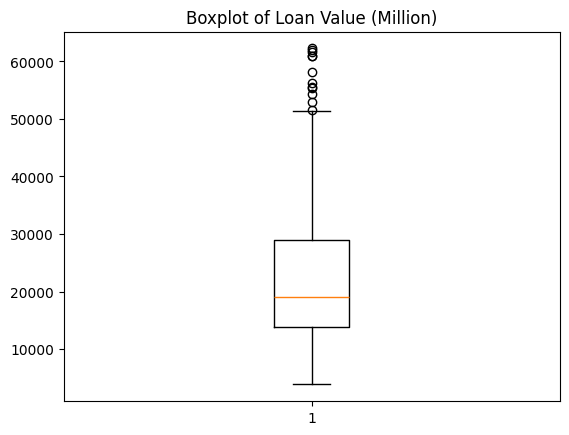

In [ ]:


plt.boxplot(df_clean['loan_value_million'])
plt.title('Boxplot of Loan Value (Million)')
plt.show()


In [56]:
df_clean['loan_value_million'].describe()

count      372.000000
mean     21864.808871
std      12174.264911
min       3845.500000
25%      13833.325000
50%      19101.250000
75%      28934.200000
max      62251.100000
Name: loan_value_million, dtype: float64

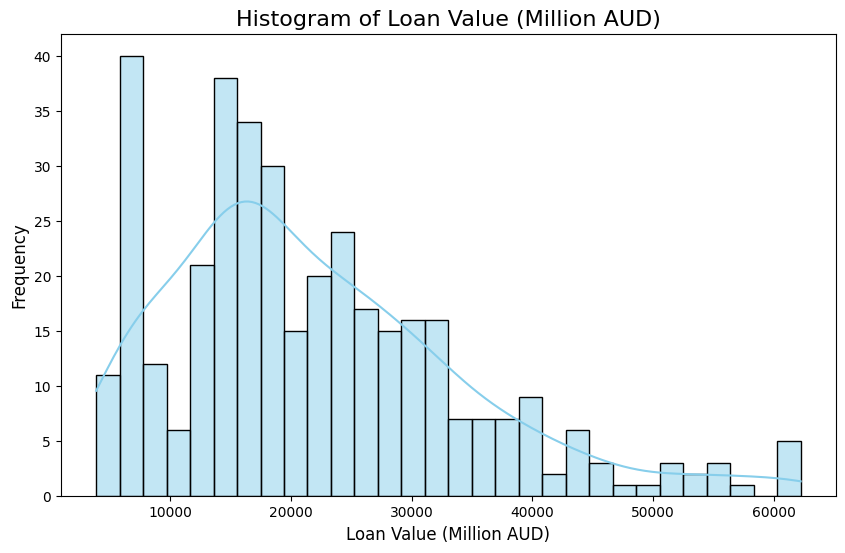

In [58]:


# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df_clean['loan_value_million'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Loan Value (Million AUD)', fontsize=16)
plt.xlabel('Loan Value (Million AUD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


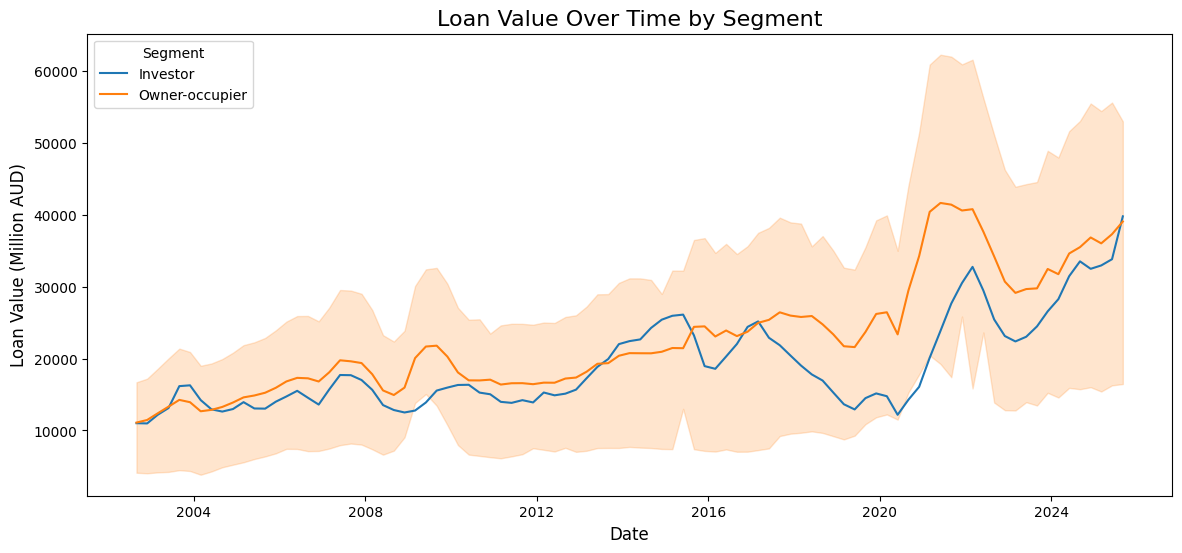

In [59]:
# Make sure date is in datetime format
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Plot loan value over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df_clean, x='date', y='loan_value_million', hue='segment')
plt.title('Loan Value Over Time by Segment', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Loan Value (Million AUD)', fontsize=12)
plt.legend(title='Segment')
plt.show()


### Post-2020 Loan Values Analysis

Statistical outliers are typically data points that are abnormally different from the rest of the data, often due to errors, noise, or exceptional events.  

In this dataset, the Owner-occupier loan values post-2020 are **high compared to pre-2020**, but these numbers reflect real-world events, including:

- Post-COVID government incentives  
- Low interest rates  
- Property market boom  

Therefore, these values are **valid data points**, not errors.  

**Key takeaway:**  
- Loan values increased sharply after 2020, reflecting genuine trends in the housing market.  
- These high values carry essential information about market shifts and should **not be removed** during analysis or modeling.  
